In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import time
from datetime import datetime

In [2]:
thermometer_ordered = pd.read_csv("results_experiment20180520213520.csv", sep=';', index_col=False)
thermometer_reverse_ordered = pd.read_csv("results_experiment20180521051328.csv", sep=';', index_col=False)
one_hot_ordered = pd.read_csv("results_experiment20180521155145.csv", sep=';', index_col=False)
one_hot_reverse_ordered = pd.read_csv("results_experiment20180522001602.csv", sep=';', index_col=False)


In [3]:
thermometer_ordered.head()

,data_distribution,tuple_size,bleaching_active,total_training_time,avg_in_sample_evaluation_time,total_in_sample_evaluation_time,avg_out_sample_evaluation_time,total_out_sample_evaluation_time,total_training_data,total_correct_training,...,correctly_approved_test,wrongly_approved_test,percent_approved_correctly_test,total_reproved_test,correctly_reproved_test,wrongly_reproved_test,percent_reproved_correctly_test,total_ties,ties_for_zeros,ties_for_ones
0,5/5,1,False,0.013009,0.000782,0.007904,0.000811,147.676297,10,10,...,105490,18621,0.683487,27729,9108,48851,0.328465,18416,3044,15372
1,5/5,1,True,0.006279,0.001064,0.010753,0.000991,180.490107,10,9,...,116239,20859,0.753131,27729,6870,38102,0.247755,0,0,0
2,5/5,2,False,0.004458,0.000575,0.005810,0.000591,107.580183,10,10,...,114165,20375,0.739693,27729,7354,40176,0.265210,12343,1971,10372
3,5/5,2,True,0.004458,0.000674,0.006780,0.000657,119.591923,10,10,...,119711,21486,0.775627,27729,6243,34630,0.225143,0,0,0
4,5/5,3,False,0.006364,0.000565,0.005688,0.000513,93.353505,10,10,...,113380,20358,0.734607,27729,7371,40961,0.265823,10343,1582,8761


In [4]:
thermometer_ordered.columns

Index(['data_distribution', 'tuple_size', 'bleaching_active',
       'total_training_time', 'avg_in_sample_evaluation_time',
       'total_in_sample_evaluation_time', 'avg_out_sample_evaluation_time',
       'total_out_sample_evaluation_time', 'total_training_data',
       'total_correct_training', 'percent_correct_training',
       'total_approved_training', 'correctly_approved_training',
       'wrongly_approved_training', 'percent_approved_correctly_training',
       'total_reproved_training', 'correctly_reproved_training',
       'wrongly_reproved_training', 'percent_reproved_correctly_training',
       'total_test_data', 'total_correct_test', 'percent_correct_test',
       'total_approved_test', 'correctly_approved_test',
       'wrongly_approved_test', 'percent_approved_correctly_test',
       'total_reproved_test', 'correctly_reproved_test',
       'wrongly_reproved_test', 'percent_reproved_correctly_test',
       'total_ties', 'ties_for_zeros', 'ties_for_ones'],
      dtype='ob

In [5]:
dd55 = thermometer_ordered[(thermometer_ordered["data_distribution"] == "5/5") & (thermometer_ordered["bleaching_active"] == False)]
dd55

,data_distribution,tuple_size,bleaching_active,total_training_time,avg_in_sample_evaluation_time,total_in_sample_evaluation_time,avg_out_sample_evaluation_time,total_out_sample_evaluation_time,total_training_data,total_correct_training,...,correctly_approved_test,wrongly_approved_test,percent_approved_correctly_test,total_reproved_test,correctly_reproved_test,wrongly_reproved_test,percent_reproved_correctly_test,total_ties,ties_for_zeros,ties_for_ones
0,5/5,1,False,0.013009,0.000782,0.007904,0.000811,147.676297,10,10,...,105490,18621,0.683487,27729,9108,48851,0.328465,18416,3044,15372
2,5/5,2,False,0.004458,0.000575,0.005810,0.000591,107.580183,10,10,...,114165,20375,0.739693,27729,7354,40176,0.265210,12343,1971,10372
4,5/5,3,False,0.006364,0.000565,0.005688,0.000513,93.353505,10,10,...,113380,20358,0.734607,27729,7371,40961,0.265823,10343,1582,8761
6,5/5,4,False,0.004133,0.000461,0.004647,0.000462,84.034708,10,10,...,109806,19870,0.711451,27729,7859,44535,0.283422,10173,1509,8664
8,5/5,5,False,0.003455,0.000433,0.004365,0.000442,80.388608,10,10,...,99978,17827,0.647773,27729,9902,54363,0.357099,10727,1650,9077
10,5/5,6,False,0.003544,0.000418,0.004216,0.000424,77.132562,10,10,...,112702,20230,0.730214,27729,7499,41639,0.270439,9779,1536,8243
12,5/5,7,False,0.004339,0.000600,0.006046,0.000412,74.966300,10,10,...,100803,18110,0.653119,27729,9619,53538,0.346893,11379,1708,9671
14,5/5,8,False,0.003209,0.000394,0.003977,0.000403,73.403996,10,10,...,100720,18059,0.652581,27729,9670,53621,0.348732,15017,2294,12723
16,5/5,9,False,0.003229,0.000382,0.003860,0.000397,72.302740,10,10,...,90032,16082,0.583332,27729,11647,64309,0.420030,19367,3010,16357
18,5/5,10,False,0.003156,0.000384,0.003876,0.000387,70.482338,10,10,...,95249,17000,0.617133,27729,10729,59092,0.386923,20898,3299,17599


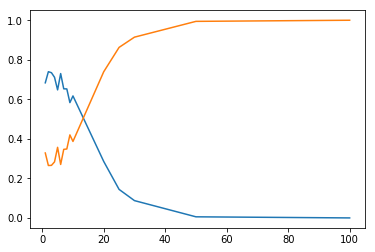

In [6]:
plt.plot(dd55["tuple_size"], dd55["percent_approved_correctly_test"])
plt.plot(dd55["tuple_size"], dd55["percent_reproved_correctly_test"])

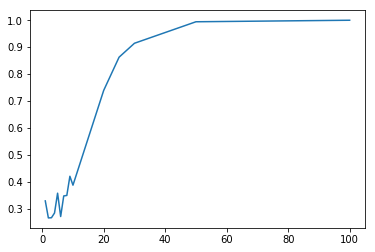

In [7]:
plt.plot(dd55["tuple_size"], dd55["percent_reproved_correctly_test"])

In [8]:
dd55["percent_correct_test"]

0     0.629417
2     0.667430
4     0.663212
6     0.646262
8     0.603504
10    0.660191
12    0.606481
14    0.606305
16    0.558461
18    0.582073
20    0.354853
22    0.253683
24    0.213506
26    0.156193
28    0.152321
Name: percent_correct_test, dtype: float64

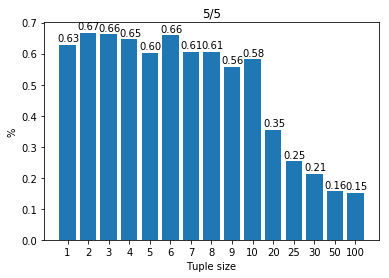

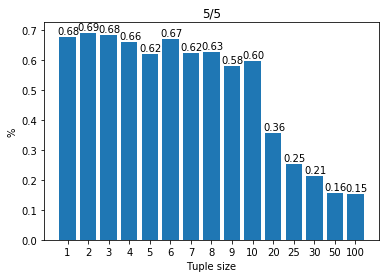

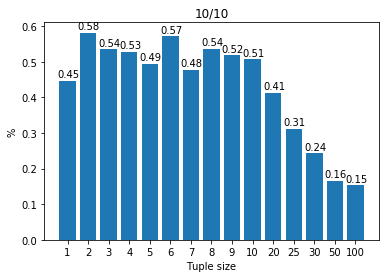

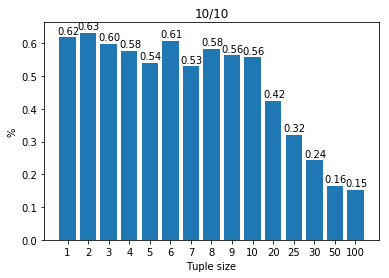

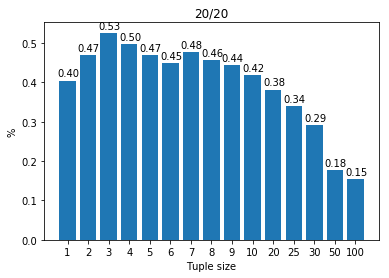

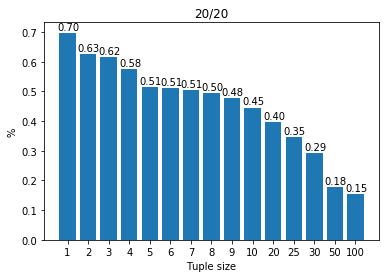

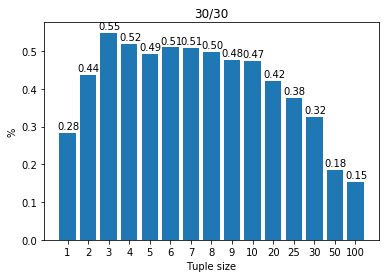

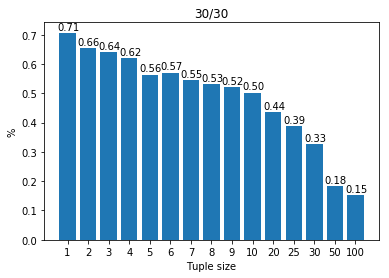

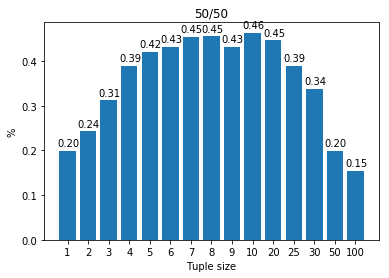

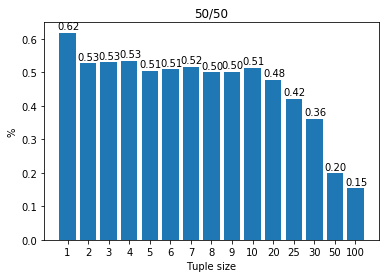

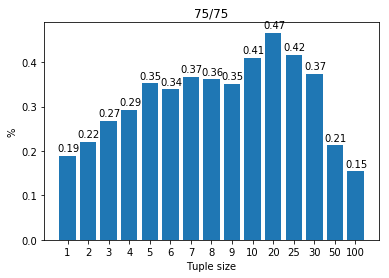

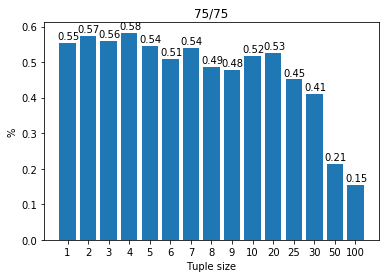

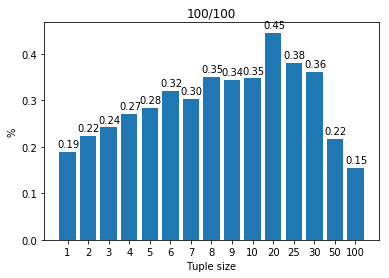

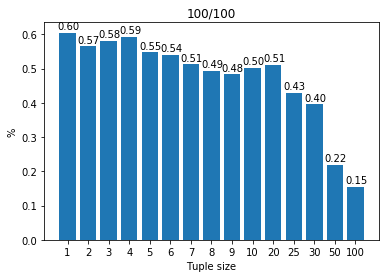

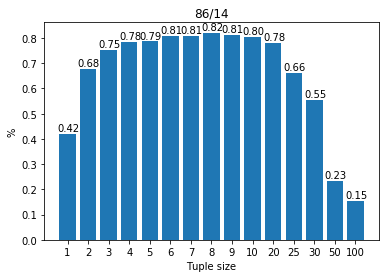

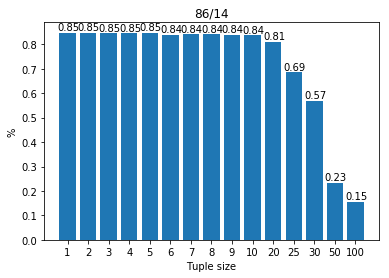

In [9]:
# training_set_distribuitions = [[5, 5], [10, 10], [20, 20], [30, 30], [50, 50], [75, 75], [86, 14], [100, 100]]
distributions = ["5/5","10/10","20/20","30/30","50/50","75/75","100/100", "86/14"]

dataframe = thermometer_ordered

for distribution in distributions:
    for bleaching_mode in [False, True]:
        dd = thermometer_ordered[(dataframe["data_distribution"] == distribution) & (dataframe["bleaching_active"] == bleaching_mode)]

        fig, ax = plt.subplots()
        #ax.yaxis.set_major_formatter(formatter)

        x = range(len(dd["percent_correct_test"]))
        plt.bar(x, height=dd["percent_correct_test"],  width = 0.8)
        plt.xticks(x, dd["tuple_size"])

        for a,b in zip(x, dd["percent_correct_test"]):
            plt.text(a - 0.5, b + 0.01, str("{0:.2f}".format(b)))

        plt.title(distribution)
        plt.ylabel("%")
        plt.xlabel("Tuple size")

        plt.show()


In [38]:
def plot_data(distributions, dataframe):
    width = 0.35

    for distribution in distributions:
        #for bleaching_mode in [False, True]:
        dd = dataframe[(dataframe["data_distribution"] == distribution) & (dataframe["bleaching_active"] == False)]
        bd = dataframe[(dataframe["data_distribution"] == distribution) & (dataframe["bleaching_active"] == True)]
        
        fig, ax = plt.subplots(figsize=(15, 8))
        #ax.yaxis.set_major_formatter(formatter)

        x = np.arange(len(dd["percent_correct_test"]))
        rects1 = ax.bar(x, height=dd["percent_correct_test"], color="green", width = width)
        rects2 = ax.bar(x + width, height=bd["percent_correct_test"], color="brown", width = width)
        #

        for a,b in zip(x, dd["percent_correct_test"]):
            plt.text(a - 0.2, b + 0.01, str("{0:.2f}".format(b)))

        for a,b in zip(x, bd["percent_correct_test"]):
            plt.text(a + width - 0.2, b + 0.01, str("{0:.2f}".format(b)))
            
        rects3 = ax.plot(x, dd["percent_reproved_correctly_test"], color="blue")
        rects4 = ax.plot(x, bd["percent_reproved_correctly_test"], color="red")

        ax.set_title("Percentage of correct answers (bars) and performance in the \"reproved\" class (lines) for a test set with a distribution of " + distribution)
        ax.set_ylabel("%")
        ax.set_xlabel("Tuple size")

        ax.set_xticks(x + width / 2)
        ax.set_xticklabels(dd["tuple_size"])
        ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Standard', 'Bleaching', 'Standard', 'Bleaching'))

        plt.show()

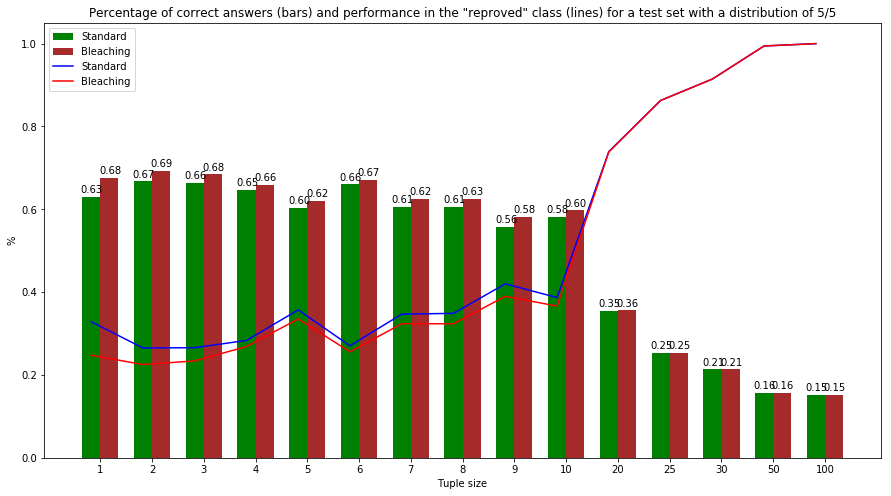

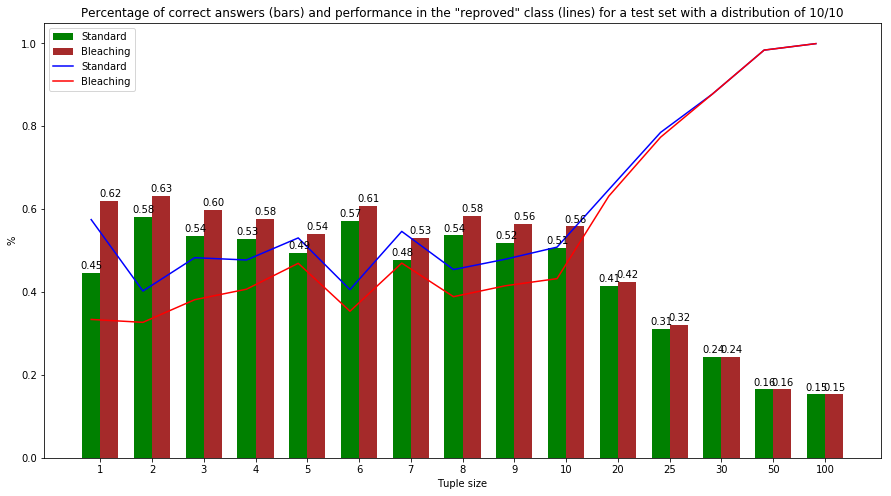

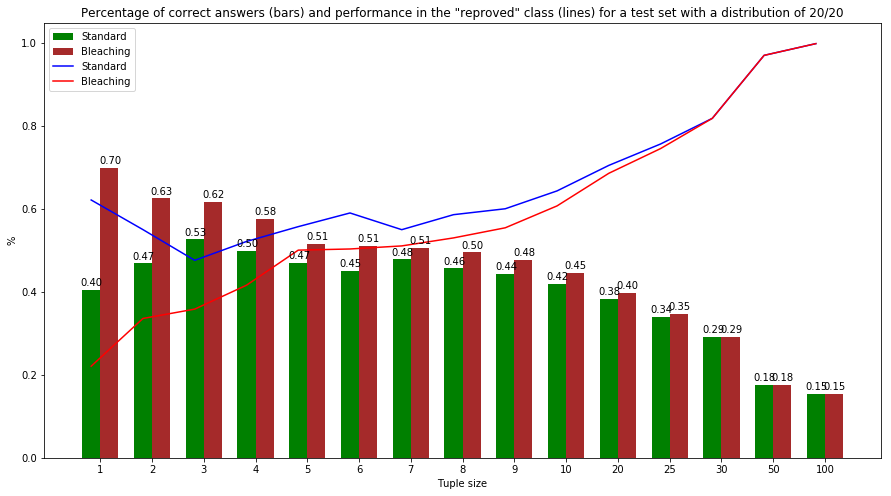

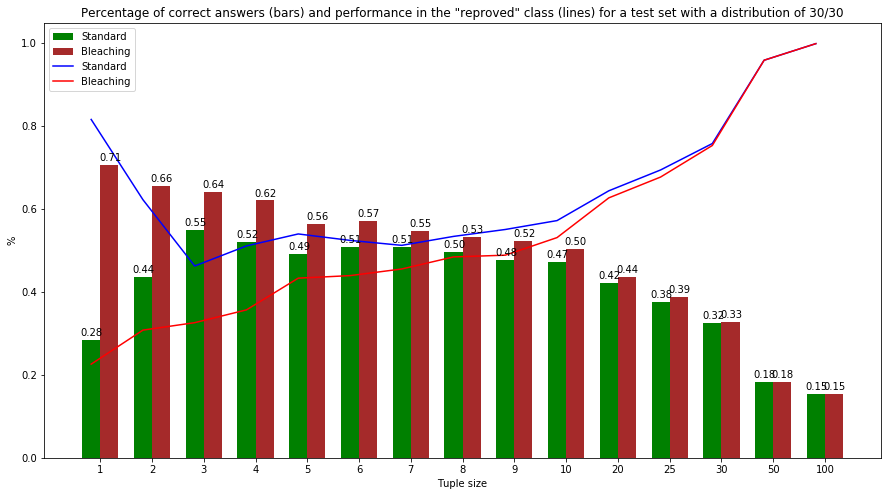

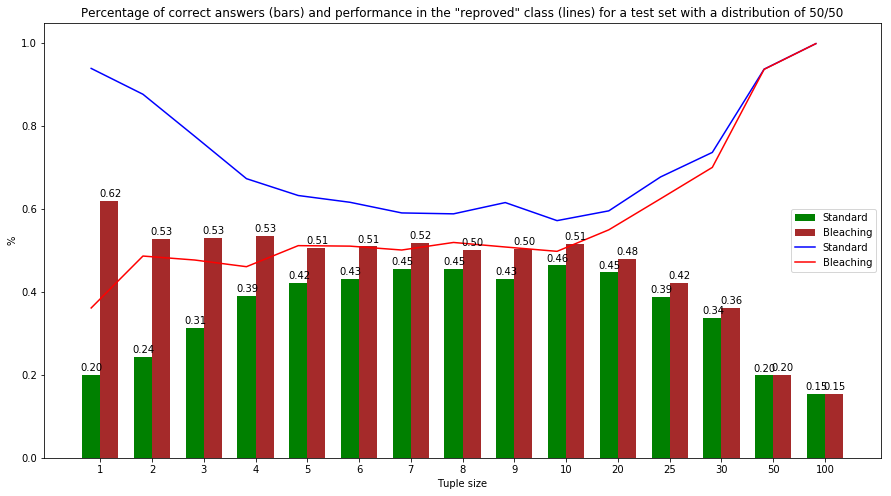

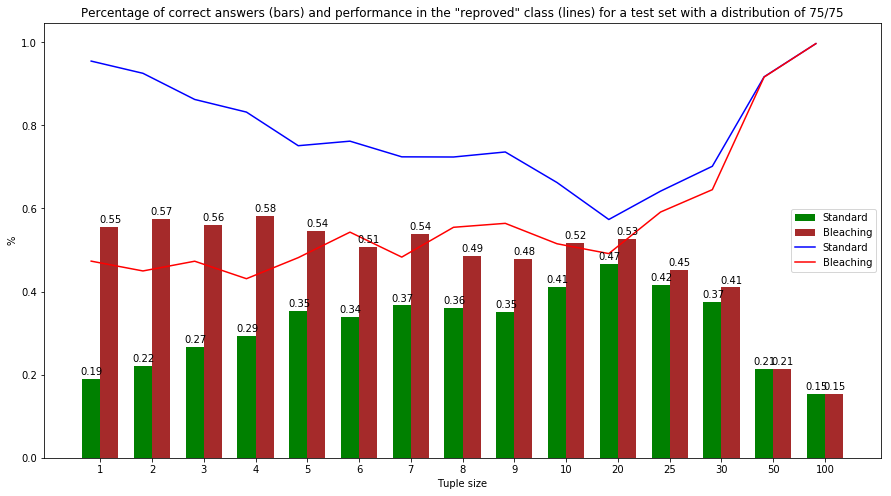

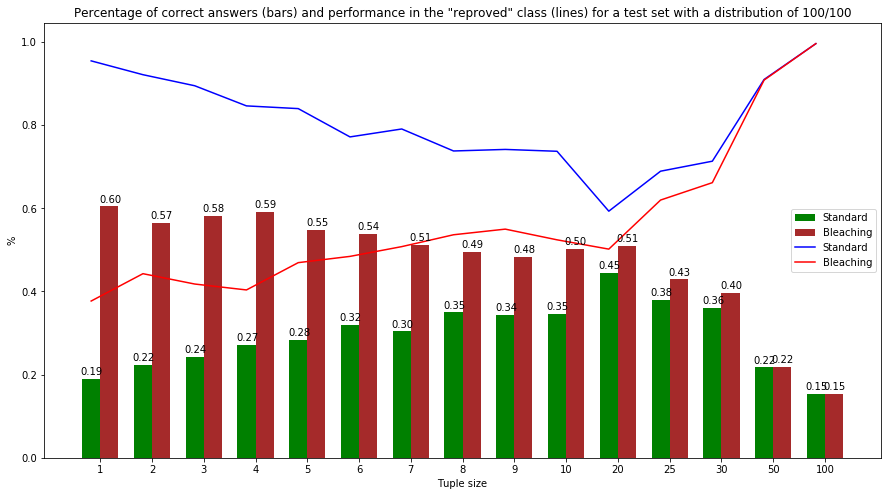

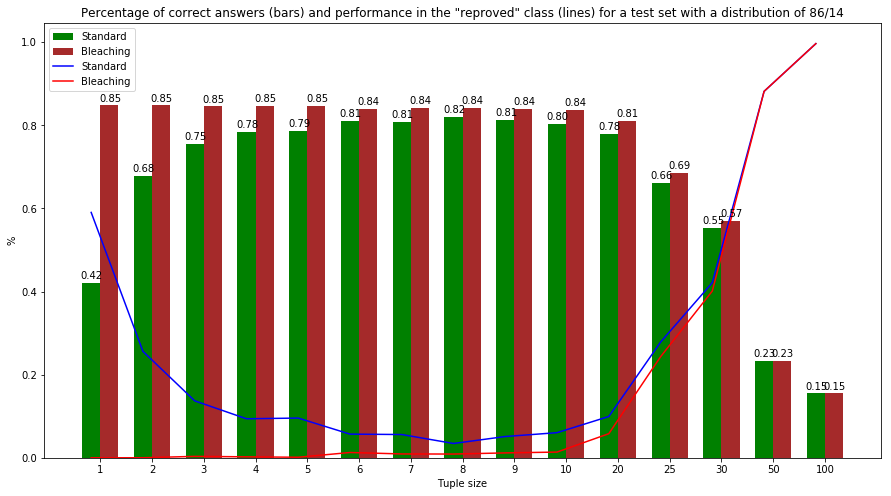

In [39]:
distributions = ["5/5","10/10","20/20","30/30","50/50","75/75","100/100", "86/14"]

plot_data(distributions, thermometer_ordered)

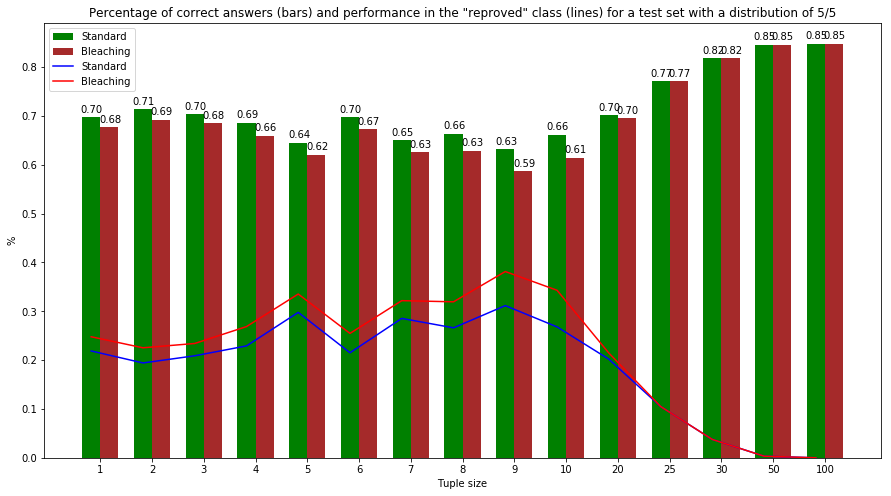

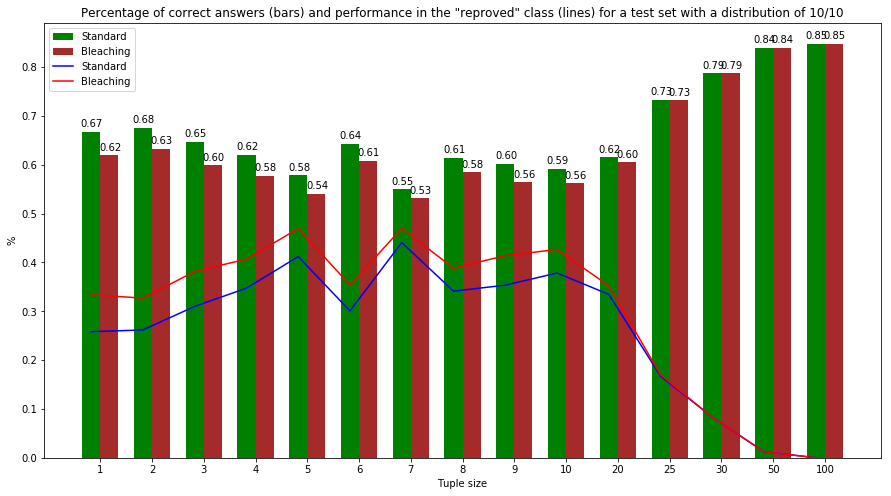

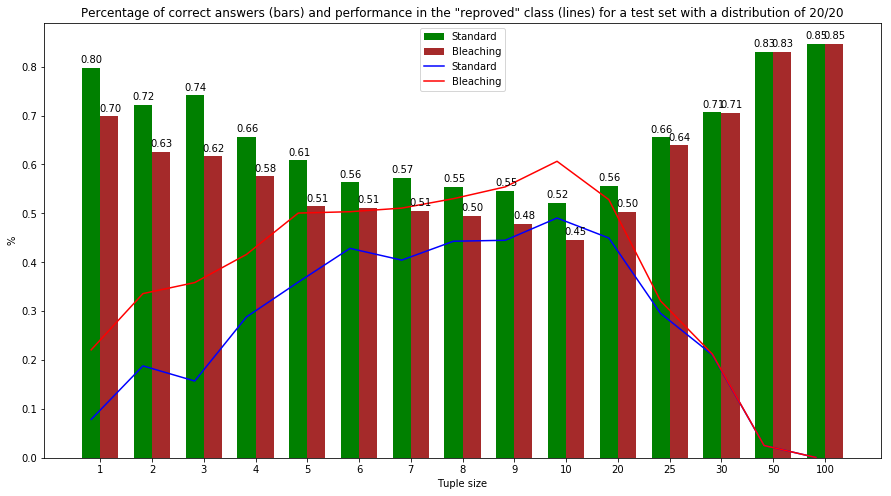

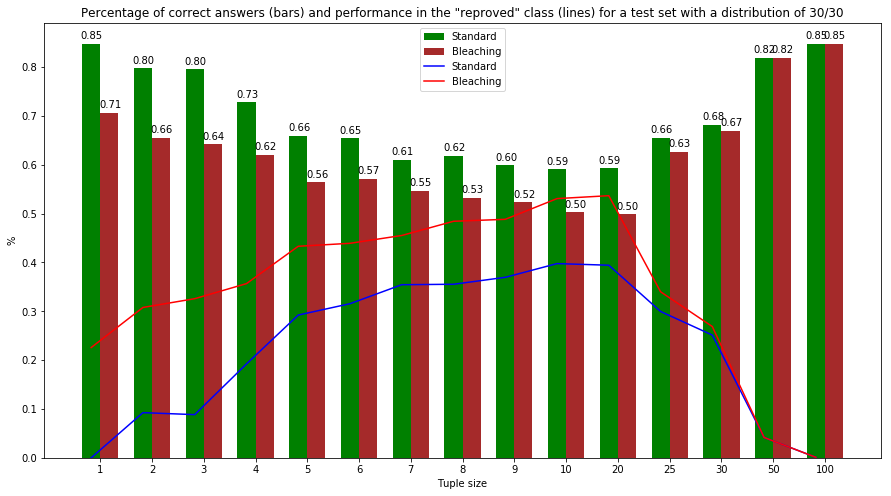

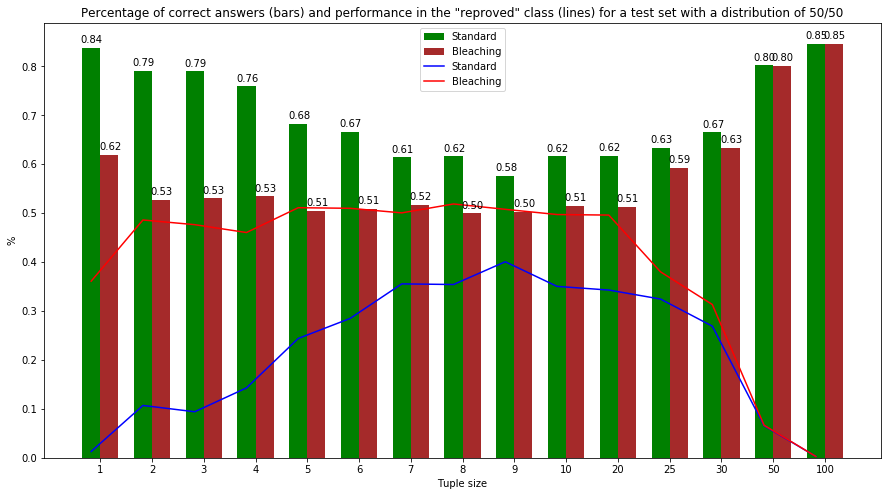

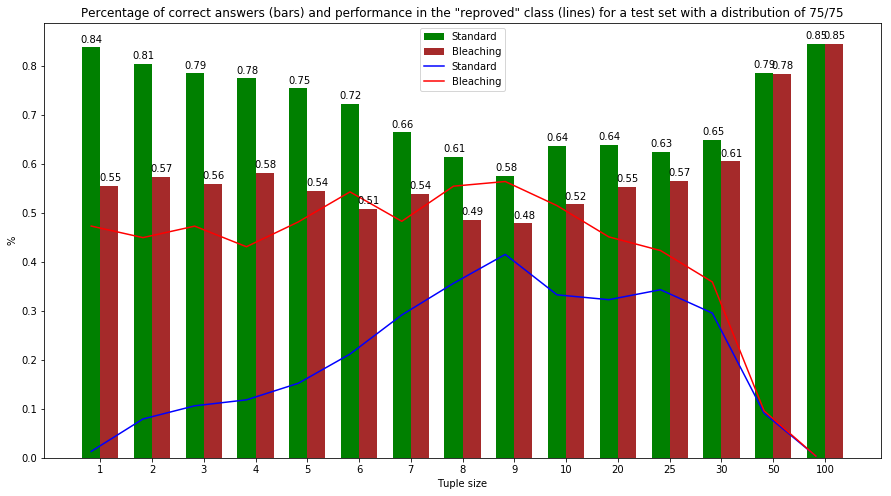

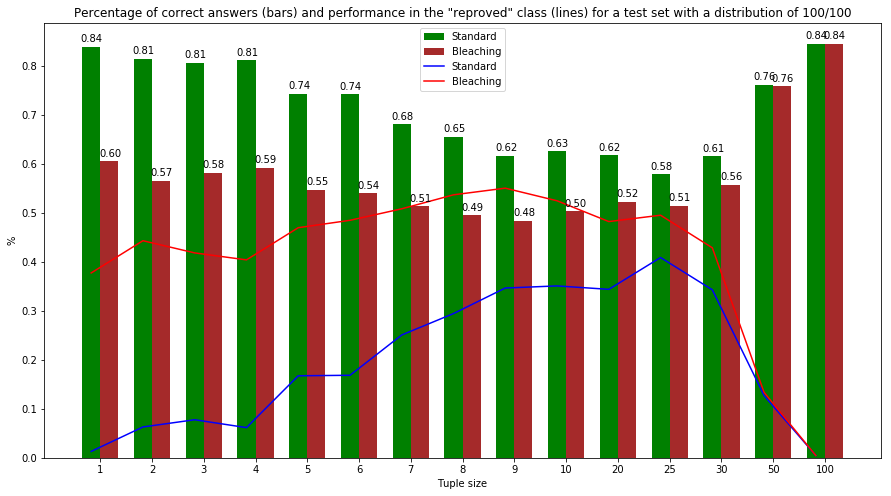

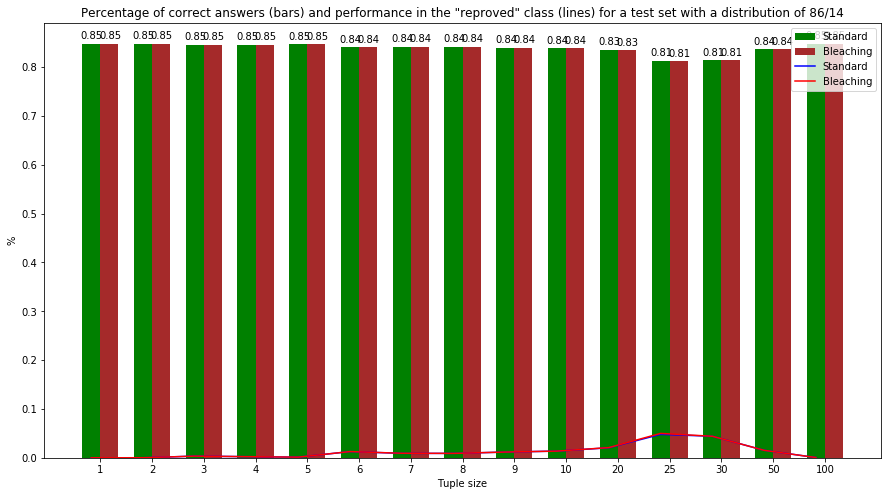

In [40]:
plot_data(distributions, thermometer_reverse_ordered)

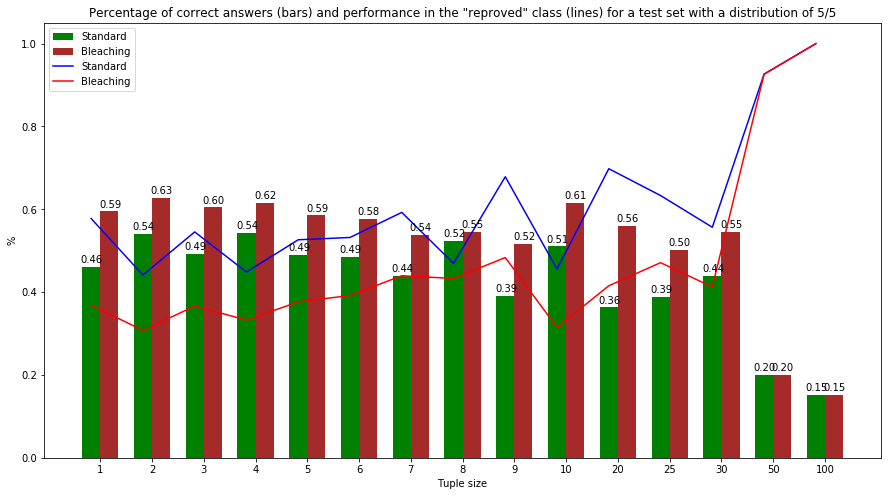

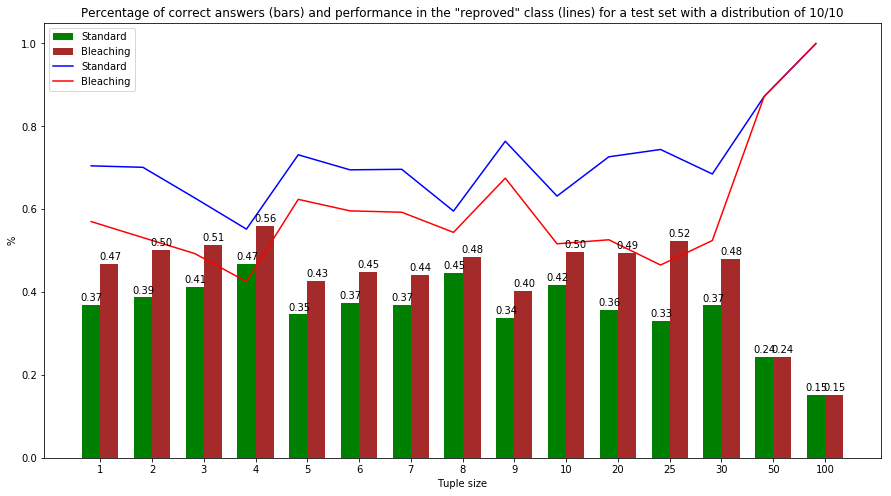

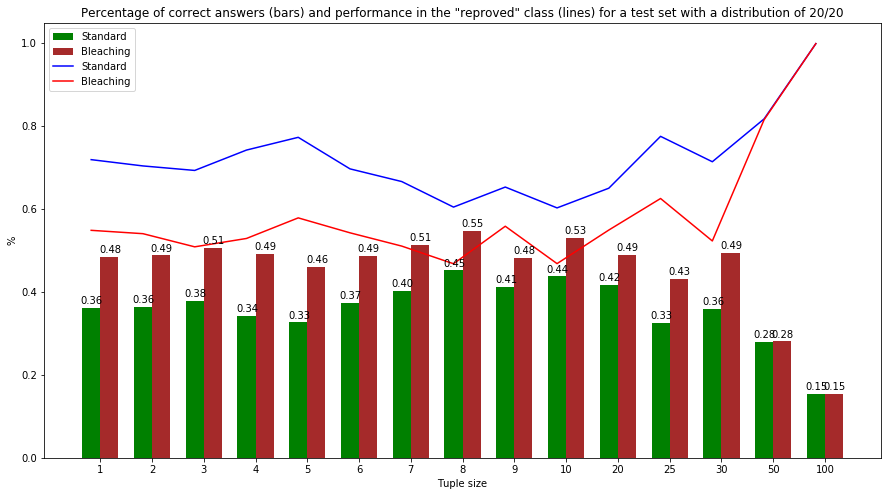

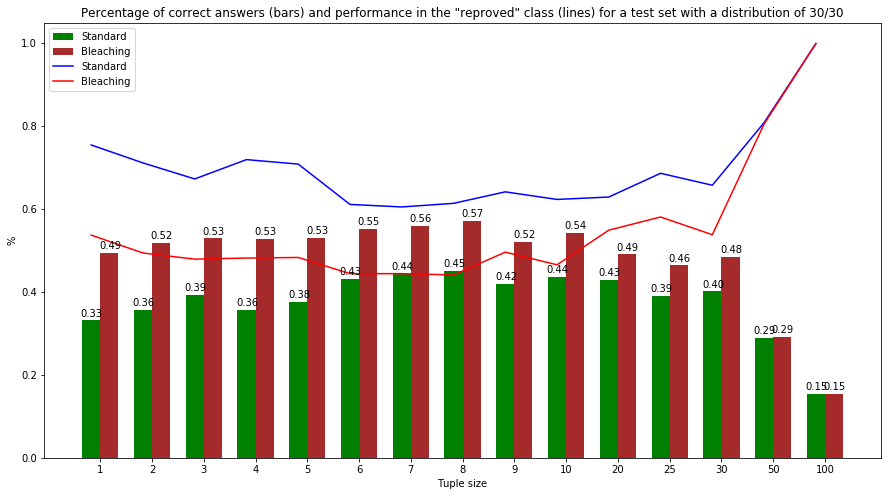

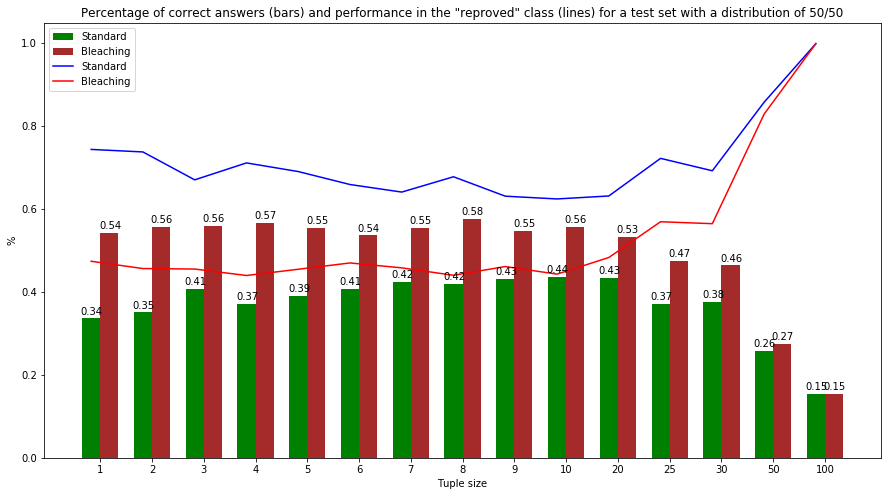

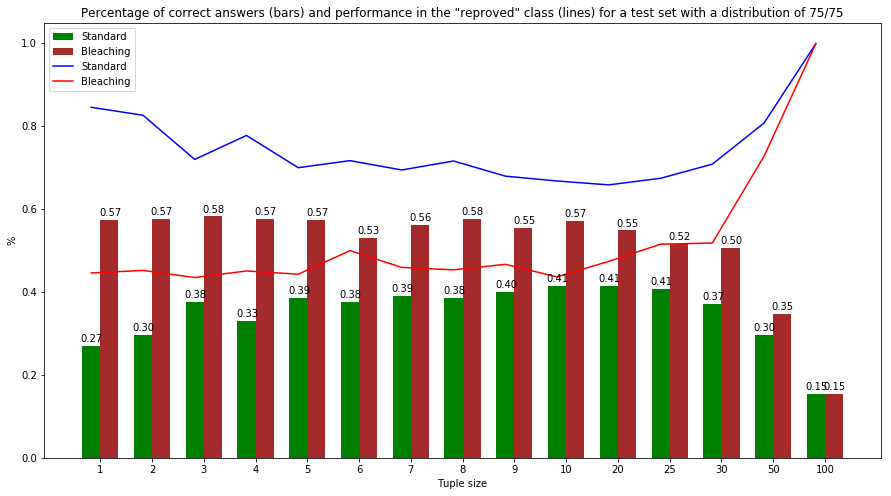

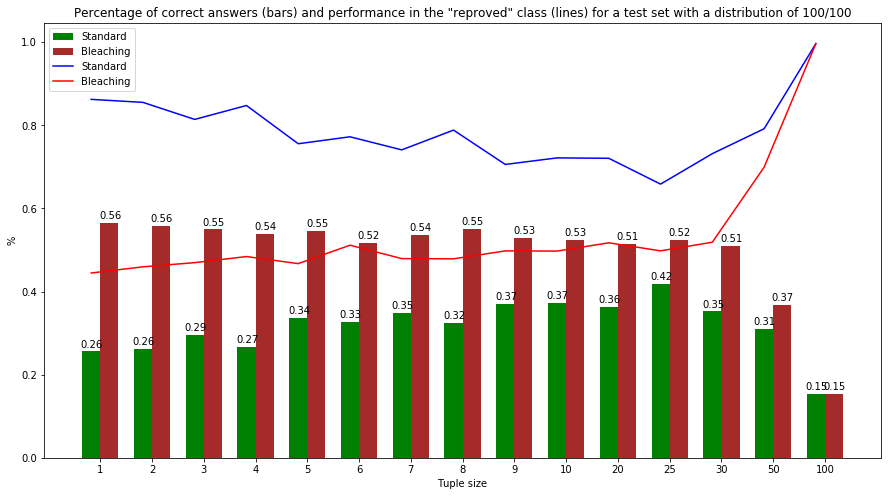

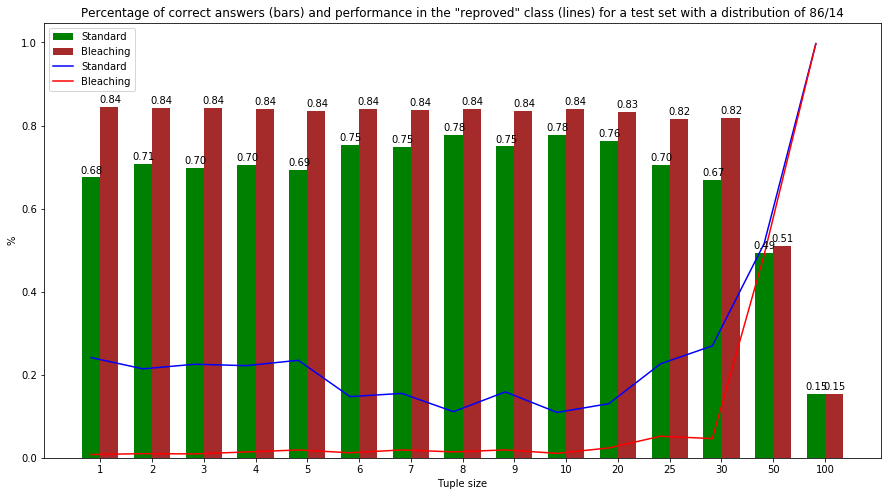

In [41]:
plot_data(distributions, one_hot_ordered)

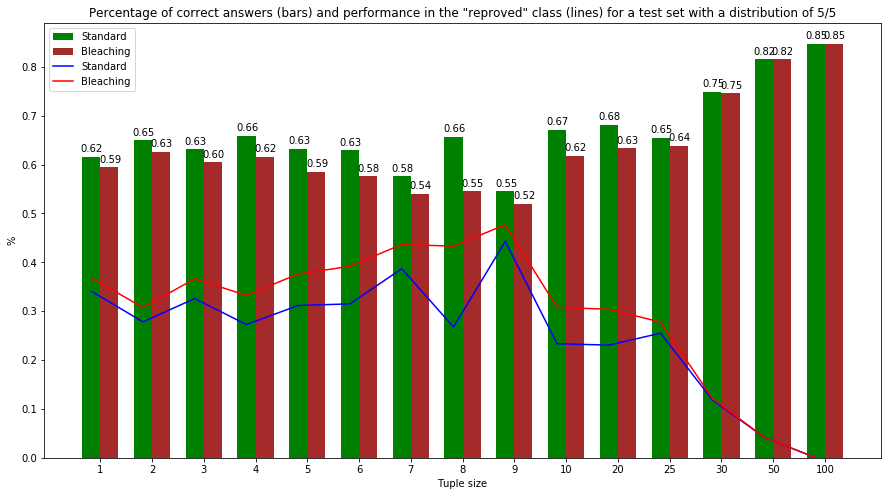

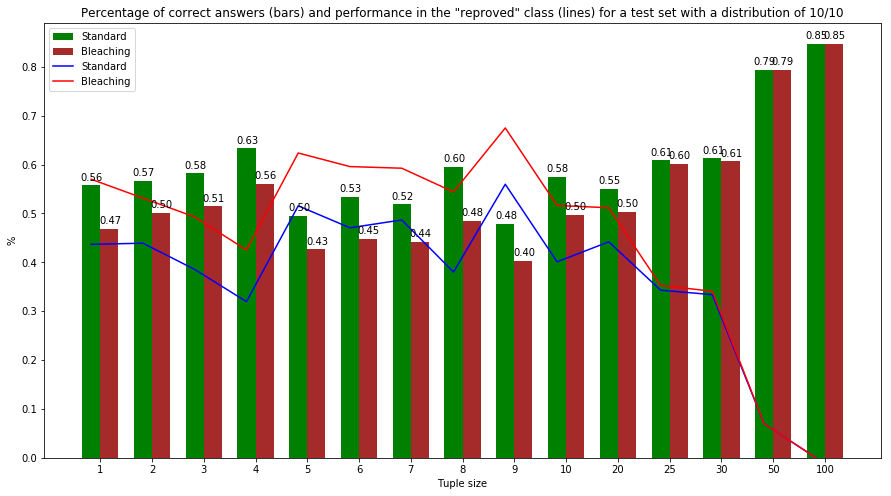

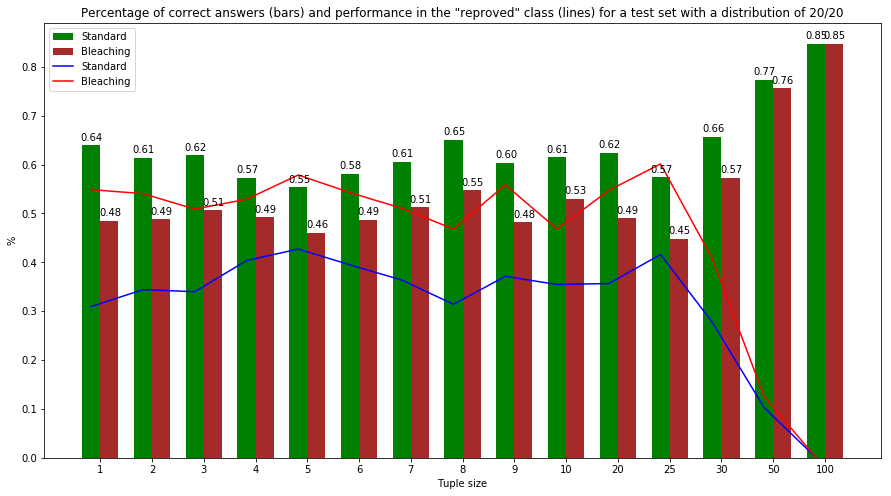

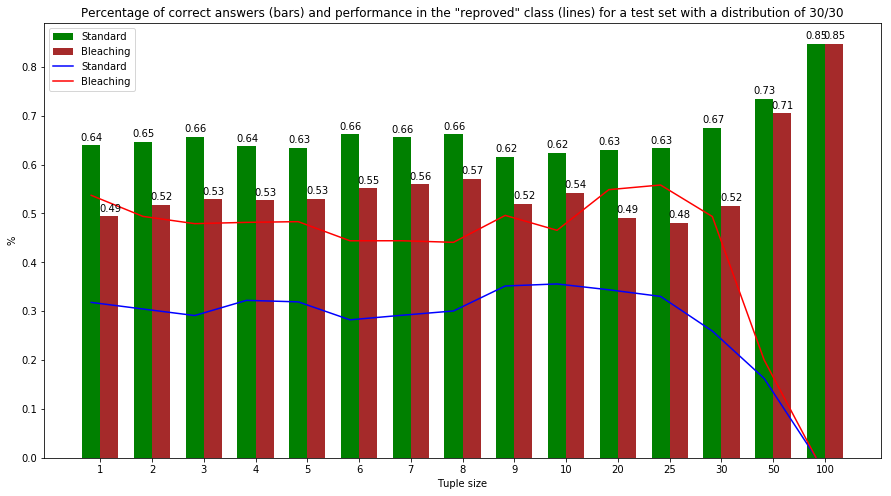

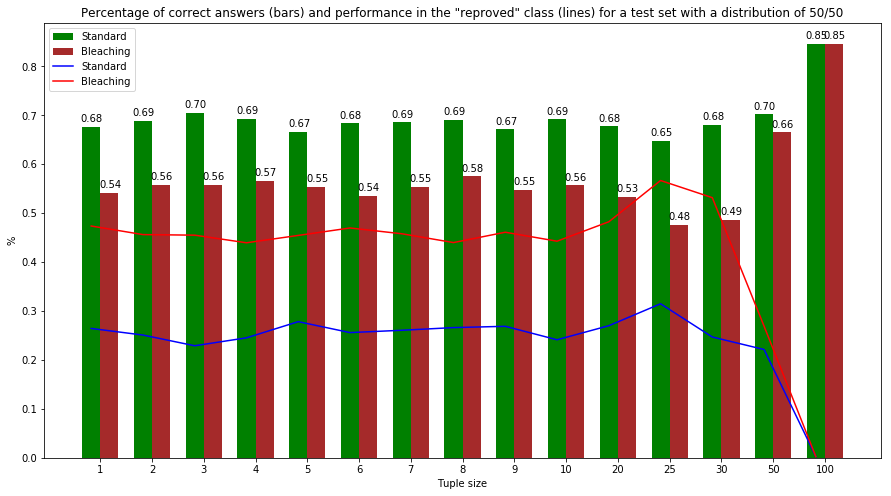

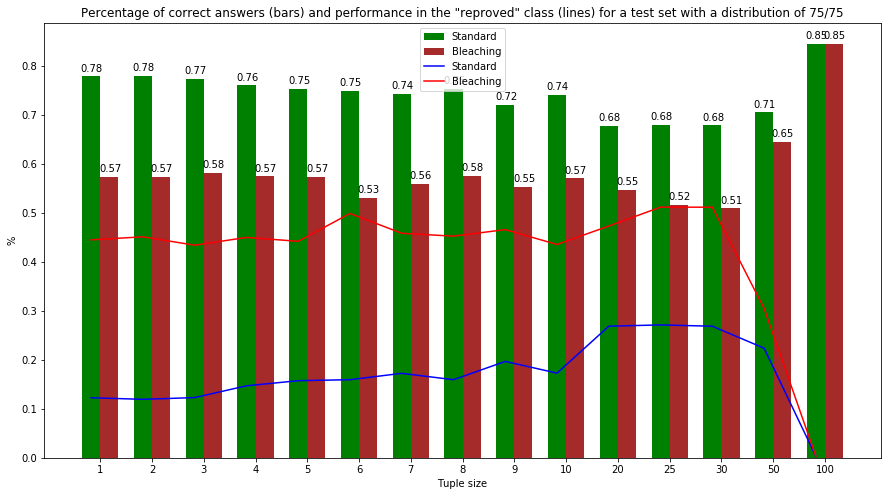

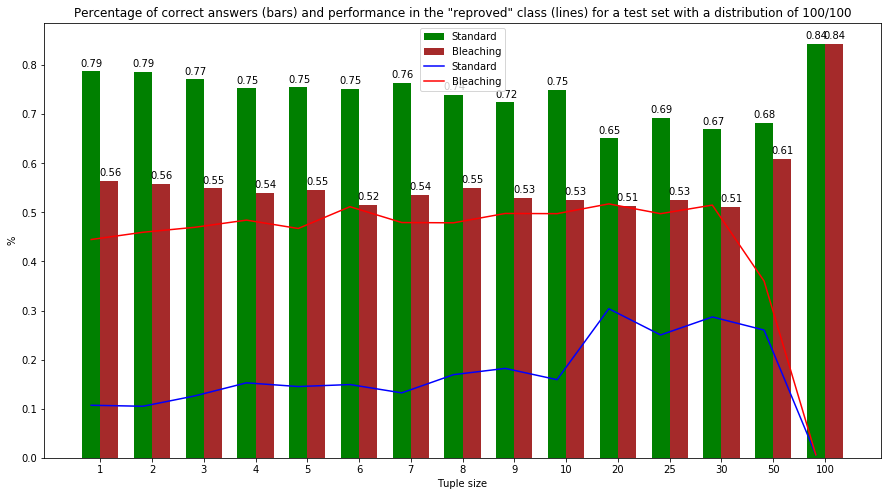

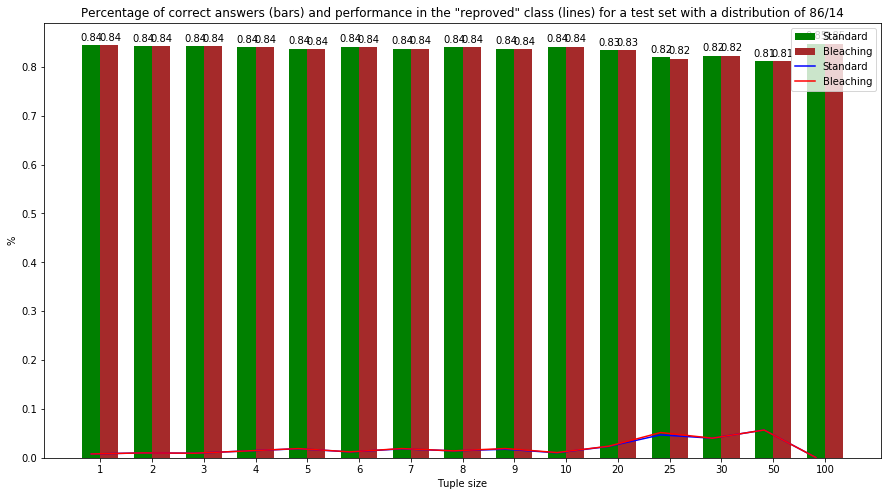

In [42]:
plot_data(distributions, one_hot_reverse_ordered)

NameError: name 'men_means' is not defined

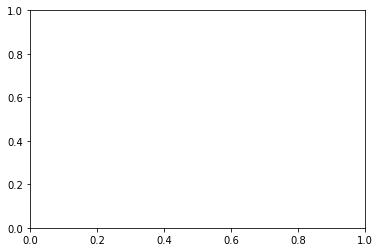